# 6. Construyendo para todos

La vivienda de interés social (VIS) en Cali es un elemento crucial para el desarrollo urbano y la equidad social. Su importancia radica en que proporciona soluciones habitacionales a la población de menores ingresos, contribuyendo a reducir el déficit cuantitativo y cualitativo de vivienda. Al ubicarse en el marco de proyectos de urbanismo formal, estas viviendas no solo ofrecen un techo digno, sino que también fomentan la integración ciudadana, previenen la expansión de asentamientos informales en zonas de alto riesgo y promueven la reactivación económica del sector de la construcción. Por lo tanto, la VIS es una herramienta fundamental para la construcción de una ciudad más inclusiva, ordenada y sostenible.

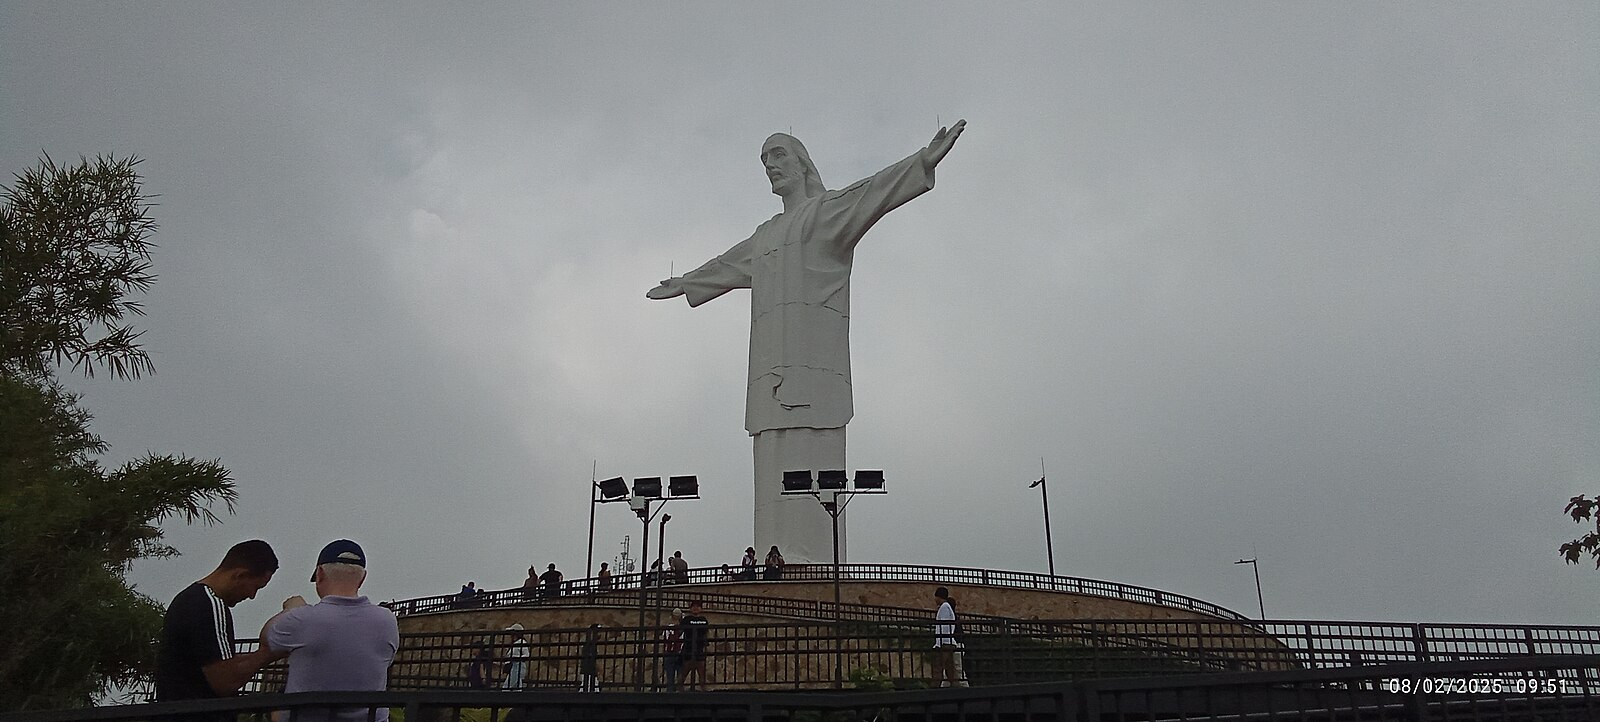


## 6.2 Tema

Ecuaciones polinomiales
## 6.3  Objetivo

Construir un estrategia para determinar el deflexión de una viga sometida a cargas distribuidas utilizando ecuaciones polinomiales.

## 6.4 Actividad

### 6.4.1  Determinar la deflexión de una viga empotrada

En un conjunto de VIS se están instalando \textit{marquesinas metálicas en voladizo} sobre las puertas de acceso para proteger de la lluvia. Cada marquesina funciona como una \textit{viga empotrada} en el muro, con longitud libre de 20 pies. Durante instalación y mantenimiento puede actuar una carga puntual de 600 lb en el extremo libre. Para verificar el desempeño en servicio y evitar que la deformación afecte las puertas o genere empozamientos, se modela la flecha a lo largo del voladizo mediante
$$
d(x)=\frac{1}{16000}\,\bigl(60x^{2}-x^{3}\bigr),
$$
donde $d$ está en pulgadas y $x$ en pies$, medidos desde el empotramiento. Con base en esta información, Calcule $x$ cuando la flexión es de 0.1215 pulgadas y también
cuando la flexión es de 1 pulgada.

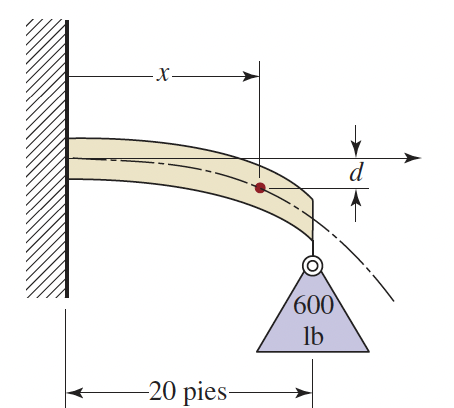

#### 6.4.1.1 Manos a la obra

1. **Comprender el problema.** En esta etapa se busca comprender bien el problema que se quiere resolver e identificar las variables, datos y reglas relevantes para solucionar el problema. Descríbelos. Es posible que exista información que no sea significativa para la solución del problema, indique cual es y porque

3. **Ejecutar el plan.** En esta etapa deberías ejecutar la estrategia identificada en el paso anterior usando herramientas matemáticas, posiblemente asistidas por software.


4. **Examinar la solución obtenida** Siempre que encuentres una solución de un problema es importante asegurarte que los resultados obtenido sean acordes  a las condiciones  iniciales del problema, factibles y en el caso contrario deberías regresar el primer paso.

### 6.4.2 Jugando con el computador!




In [5]:
# Análisis Interactivo de Flexión en Vigas
# Cuaderno Jupyter con widgets interactivos

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, FloatSlider, Button, VBox, HBox, Label, FloatText, Output
from IPython.display import display, clear_output, HTML

# Configuración de estilo de gráficos
plt.style.use('seaborn-v0_8-darkgrid')

# ============================================
# PROBLEMA: VIGA EN VOLADIZO
# ============================================
print("="*60)
print("PROBLEMA: FLEXIÓN DE UNA VIGA EN VOLADIZO")
print("="*60)
print("\nUna viga en voladizo tiene 20 pies de longitud y se carga")
print("con 600 lb en su extremo derecho. La flexión está dada por:")
print("\n    d(x) = (1/16000)(60x² - x³)")
print("\ndonde:")
print("  - d: flexión en pulgadas")
print("  - x: distancia desde el soporte en pies (0 ≤ x ≤ 20)")
print("="*60)

# Función de deflexión
def deflection(x):
    """
    Calcula la deflexión de la viga en la posición x
    d(x) = (1/16000)(60x² - x³)
    """
    return (1/16000) * (60 * x**2 - x**3)

# Derivada de la deflexión (para encontrar máximo)
def deflection_derivative(x):
    """
    Calcula la derivada de d(x)
    d'(x) = (1/16000)(120x - 3x²)
    """
    return (1/16000) * (120*x - 3*x**2)

# ============================================
# VISUALIZACIÓN INTERACTIVA
# ============================================

def plot_beam_deflection(x_position=10.0):
    """
    Grafica la curva de deflexión y muestra el punto seleccionado
    """
    x = np.linspace(0, 20, 500)
    y = deflection(x)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
    
    # Gráfica principal
    ax1.plot(x, y, 'b-', linewidth=2.5, label='Curva de flexión d(x)')
    ax1.axvline(x_position, color='red', linestyle='--', linewidth=2, alpha=0.7, label=f'Posición x = {x_position:.2f} pies')
    ax1.plot(x_position, deflection(x_position), 'ro', markersize=12, label=f'd = {deflection(x_position):.4f} pulg')
    ax1.grid(True, alpha=0.3)
    ax1.set_xlabel('Posición x (pies)', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Flexión d (pulgadas)', fontsize=12, fontweight='bold')
    ax1.set_title('Flexión de la Viga en Voladizo', fontsize=14, fontweight='bold')
    ax1.legend(fontsize=10)
    ax1.set_xlim(0, 20)
    
    # Diagrama esquemático de la viga
    ax2.set_xlim(-2, 22)
    ax2.set_ylim(-3, 2)
    ax2.axis('off')
    
    # Dibujar la viga
    viga_x = np.linspace(0, 20, 100)
    viga_y = -deflection(viga_x) * 0.3  # Escalar para visualización
    ax2.plot(viga_x, viga_y, 'brown', linewidth=8, solid_capstyle='round')
    
    # Soporte fijo (pared)
    ax2.fill_between([-1, 0], [-2, -2], [2, 2], color='gray', alpha=0.5, hatch='///')
    ax2.plot([0, 0], [-2, 2], 'k-', linewidth=3)
    
    # Carga en el extremo
    ax2.arrow(20, -deflection(20)*0.3, 0, -1.5, head_width=0.5, head_length=0.3, 
              fc='darkred', ec='darkred', linewidth=2)
    ax2.text(20, -deflection(20)*0.3 - 2, '600 lb', ha='center', fontsize=12, 
             fontweight='bold', color='darkred')
    
    # Indicador de posición actual
    ax2.plot(x_position, -deflection(x_position)*0.3, 'ro', markersize=15, zorder=5)
    ax2.arrow(x_position, 1.5, 0, -1.3 + deflection(x_position)*0.3, 
              head_width=0.3, head_length=0.2, fc='red', ec='red', linewidth=1.5)
    ax2.text(x_position, 1.8, f'x = {x_position:.1f} ft', ha='center', fontsize=11, 
             fontweight='bold', color='red')
    
    # Dimensión total
    ax2.plot([0, 20], [-2.5, -2.5], 'k-', linewidth=1)
    ax2.plot([0, 0], [-2.5, -2.7], 'k-', linewidth=1)
    ax2.plot([20, 20], [-2.5, -2.7], 'k-', linewidth=1)
    ax2.text(10, -2.9, '20 pies', ha='center', fontsize=11, fontweight='bold')
    
    ax2.set_title('Diagrama Esquemático', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n📍 Posición seleccionada: x = {x_position:.3f} pies")
    print(f"📏 Flexión calculada: d = {deflection(x_position):.6f} pulgadas")

# Crear widget interactivo
print("\n\n" + "="*60)
print("EXPLORADOR INTERACTIVO")
print("="*60)
print("Mueve el slider para explorar la deflexión en diferentes posiciones\n")

slider_widget = interactive(plot_beam_deflection, 
                           x_position=FloatSlider(min=0, max=20, step=0.1, value=10, 
                                                 description='Posición x:', 
                                                 style={'description_width': '100px'},
                                                 continuous_update=True))
display(slider_widget)

# ============================================
# PREGUNTAS PARA RESOLVER
# ============================================

print("\n\n" + "="*60)
print("PREGUNTAS A RESOLVER")
print("="*60)

# Variables globales para las respuestas
respuestas = {'p1': None, 'p2': None, 'p3a': None, 'p3b': None}

# Pregunta 1
print("\n📌 PREGUNTA 1: Flexión máxima")
print("-" * 60)
print("¿En qué posición x (en pies) se produce la flexión MÁXIMA?")
print("¿Cuál es el valor de esa flexión máxima (en pulgadas)?")
print("\nPista: Observa el punto más alto de la curva en la gráfica.")

# Crear widgets para la pregunta 1
output1 = Output()
input1_x = FloatText(description='x =', style={'description_width': '50px'}, step=0.01)
input1_d = FloatText(description='d_max =', style={'description_width': '50px'}, step=0.001)
button1 = Button(description='Verificar Respuesta 1', button_style='info')

def verificar_pregunta1(b):
    with output1:
        clear_output()
        x_resp = input1_x.value
        d_resp = input1_d.value
        
        # Respuesta correcta: x = 40 pies (máximo en d'(x) = 0)
        # Resolviendo: 120x - 3x² = 0 → x(120 - 3x) = 0 → x = 0 o x = 40
        # Pero x debe estar en [0, 20], entonces el máximo en el intervalo es en x = 20
        # Espera, recalculemos: d'(x) = (1/16000)(120x - 3x²) = 0
        # 120x - 3x² = 0 → 3x(40 - x) = 0 → x = 0 o x = 40
        # Como el dominio es [0,20], buscamos el máximo en ese intervalo
        # Evaluamos d''(x) = (1/16000)(120 - 6x)
        # En x=0: d(0) = 0
        # En x=20: d(20) = (1/16000)(60*400 - 8000) = (1/16000)(24000 - 8000) = 16000/16000 = 1
        # Verificamos puntos críticos internos: 120x - 3x² = 0 en [0,20]
        # No hay puntos críticos internos, así que el máximo es en x=20
        
        x_correcto = 20.0
        d_correcto = deflection(20.0)
        
        tol_x = 0.5
        tol_d = 0.05
        
        if abs(x_resp - x_correcto) < tol_x and abs(d_resp - d_correcto) < tol_d:
            print("✅ ¡CORRECTO! Excelente trabajo.")
            print(f"   La flexión máxima ocurre en x = {x_correcto} pies")
            print(f"   con un valor de d_max = {d_correcto:.4f} pulgadas")
            respuestas['p1'] = True
        else:
            print("❌ No es correcto. Intenta de nuevo.")
            print("   Usa el explorador interactivo para encontrar el punto más alto de la curva.")
            if abs(x_resp - x_correcto) >= tol_x:
                print(f"   Tu valor de x está {'muy lejos' if abs(x_resp - x_correcto) > 2 else 'cerca'}.")

button1.on_click(verificar_pregunta1)

print("\nIngresa tus respuestas:")
display(HBox([Label('Posición:'), input1_x, Label('pies')]))
display(HBox([Label('Flexión máxima:'), input1_d, Label('pulgadas')]))
display(button1)
display(output1)

# Pregunta 2
print("\n\n📌 PREGUNTA 2: Flexión en la mitad de la viga")
print("-" * 60)
print("¿Cuál es la flexión (en pulgadas) cuando x = 10 pies?")
print("(Es decir, en la mitad de la viga)")

output2 = Output()
input2 = FloatText(description='d(10) =', style={'description_width': '60px'}, step=0.001)
button2 = Button(description='Verificar Respuesta 2', button_style='info')

def verificar_pregunta2(b):
    with output2:
        clear_output()
        d_resp = input2.value
        d_correcto = deflection(10.0)
        
        tol = 0.01
        
        if abs(d_resp - d_correcto) < tol:
            print("✅ ¡CORRECTO!")
            print(f"   En la mitad de la viga (x = 10 pies), la flexión es d = {d_correcto:.4f} pulgadas")
            respuestas['p2'] = True
        else:
            print("❌ No es correcto. Intenta de nuevo.")
            print("   Usa el slider para posicionar en x = 10 y observa el valor de d.")

button2.on_click(verificar_pregunta2)

print("\nIngresa tu respuesta:")
display(HBox([input2, Label('pulgadas')]))
display(button2)
display(output2)

# Pregunta 3
print("\n\n📌 PREGUNTA 3: Posiciones con flexión específica")
print("-" * 60)
print("¿En qué posición(es) x la flexión es igual a 0.5 pulgadas?")
print("Nota: Puede haber MÁS DE UNA respuesta. Si encuentras dos valores, ingrésalos ambos.")

output3 = Output()
input3a = FloatText(description='x₁ =', style={'description_width': '50px'}, step=0.01)
input3b = FloatText(description='x₂ =', style={'description_width': '50px'}, step=0.01)
button3 = Button(description='Verificar Respuesta 3', button_style='info')

def verificar_pregunta3(b):
    with output3:
        clear_output()
        x1_resp = input3a.value
        x2_resp = input3b.value
        
        # Encontrar las soluciones de: (1/16000)(60x² - x³) = 0.5
        # 60x² - x³ = 8000
        # x³ - 60x² + 8000 = 0
        # Soluciones aproximadas: x ≈ 7.54 y x ≈ 52.46 (pero solo 7.54 está en [0,20])
        # Recalculemos: -x³ + 60x² - 8000 = 0
        # Las soluciones numéricas son aproximadamente x ≈ 7.54
        
        soluciones_correctas = []
        for x_test in np.linspace(0, 20, 10000):
            if abs(deflection(x_test) - 0.5) < 0.001:
                # Verificar que no esté ya en la lista
                if not any(abs(x_test - sol) < 0.5 for sol in soluciones_correctas):
                    soluciones_correctas.append(x_test)
        
        tol = 0.3
        respuestas_usuario = [x1_resp, x2_resp]
        
        correctas = 0
        for x_resp in respuestas_usuario:
            if x_resp > 0:  # Solo considerar valores ingresados
                for x_correct in soluciones_correctas:
                    if abs(x_resp - x_correct) < tol:
                        correctas += 1
                        break
        
        if correctas == len(soluciones_correctas) and correctas > 0:
            print("✅ ¡CORRECTO! Has encontrado todas las soluciones.")
            print(f"   Posiciones donde d = 0.5 pulgadas:")
            for i, sol in enumerate(soluciones_correctas, 1):
                print(f"      x{i} ≈ {sol:.2f} pies")
            respuestas['p3a'] = True
            respuestas['p3b'] = True
        elif correctas > 0:
            print("⚠️ Parcialmente correcto.")
            print(f"   Has encontrado {correctas} de {len(soluciones_correctas)} solución(es).")
            print("   Sigue explorando con el slider.")
        else:
            print("❌ No es correcto. Intenta de nuevo.")
            print("   Mueve el slider lentamente y busca donde d ≈ 0.5")

button3.on_click(verificar_pregunta3)

print("\nIngresa tu(s) respuesta(s):")
display(HBox([Label('Primera posición:'), input3a, Label('pies')]))
display(HBox([Label('Segunda posición (si existe):'), input3b, Label('pies')]))
display(button3)
display(output3)

# Resumen final
print("\n\n" + "="*60)
print("INSTRUCCIONES FINALES")
print("="*60)
print("""
1. Usa el EXPLORADOR INTERACTIVO (slider arriba) para observar cómo 
   cambia la flexión en diferentes posiciones de la viga.

2. Responde las tres preguntas usando los valores que observas en la 
   gráfica y en los valores numéricos mostrados.

3. Haz clic en los botones "Verificar Respuesta" para comprobar si 
   tus respuestas son correctas.

4. Si una respuesta es incorrecta, vuelve a usar el explorador para 
   encontrar el valor correcto.

¡Buena suerte! 🚀
""")

PROBLEMA: FLEXIÓN DE UNA VIGA EN VOLADIZO

Una viga en voladizo tiene 20 pies de longitud y se carga
con 600 lb en su extremo derecho. La flexión está dada por:

    d(x) = (1/16000)(60x² - x³)

donde:
  - d: flexión en pulgadas
  - x: distancia desde el soporte en pies (0 ≤ x ≤ 20)


EXPLORADOR INTERACTIVO
Mueve el slider para explorar la deflexión en diferentes posiciones



interactive(children=(FloatSlider(value=10.0, description='Posición x:', max=20.0, style=SliderStyle(descripti…



PREGUNTAS A RESOLVER

📌 PREGUNTA 1: Flexión máxima
------------------------------------------------------------
¿En qué posición x (en pies) se produce la flexión MÁXIMA?
¿Cuál es el valor de esa flexión máxima (en pulgadas)?

Pista: Observa el punto más alto de la curva en la gráfica.

Ingresa tus respuestas:


Button(button_style='info', description='Verificar Respuesta 1', style=ButtonStyle())

Output()



📌 PREGUNTA 2: Flexión en la mitad de la viga
------------------------------------------------------------
¿Cuál es la flexión (en pulgadas) cuando x = 10 pies?
(Es decir, en la mitad de la viga)

Ingresa tu respuesta:


Button(button_style='info', description='Verificar Respuesta 2', style=ButtonStyle())

Output()



📌 PREGUNTA 3: Posiciones con flexión específica
------------------------------------------------------------
¿En qué posición(es) x la flexión es igual a 0.5 pulgadas?
Nota: Puede haber MÁS DE UNA respuesta. Si encuentras dos valores, ingrésalos ambos.

Ingresa tu(s) respuesta(s):


Button(button_style='info', description='Verificar Respuesta 3', style=ButtonStyle())

Output()



INSTRUCCIONES FINALES

1. Usa el EXPLORADOR INTERACTIVO (slider arriba) para observar cómo 
   cambia la flexión en diferentes posiciones de la viga.

2. Responde las tres preguntas usando los valores que observas en la 
   gráfica y en los valores numéricos mostrados.

3. Haz clic en los botones "Verificar Respuesta" para comprobar si 
   tus respuestas son correctas.

4. Si una respuesta es incorrecta, vuelve a usar el explorador para 
   encontrar el valor correcto.

¡Buena suerte! 🚀



#### 6.4.2.1 Manos a la obra

1. **Comprender el problema.** En esta etapa se busca comprender bien el problema que se quiere resolver e identificar las variables, datos y reglas relevantes para solucionar el problema. Descríbelos.

2. **Planear la solución.** En esta etapa deberías identificar los pasos necesarios para resolver el problema y seleccionar la mejor estrategia para hacerlo.

En la celda de código que tienes abajo podrás manipular los sliders para mover los puntos que definen las trayectorias de los drones y el punto en que se cruzan. Una vez que hayas encontrado el punto de cruce, usa los puntos que se muestran para determinar las ecuaciones de las rectas de cada dron.

3. **Ejecutar el plan.** En esta etapa deberías ejecutar la estrategia identificada en el paso anterior usando la celda de código que tienes abajo.


4. **Examinar la solución obtenida** Siempre que encuentres una solución de un problema es importante asegurarte que los resultados obtenido sean acordes  a las condiciones  iniciales del problema, factibles y en el caso contrario deberías regresar el primer paso.